In [17]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import numpy as np
from montecarlo.System import Grid, MCDrive

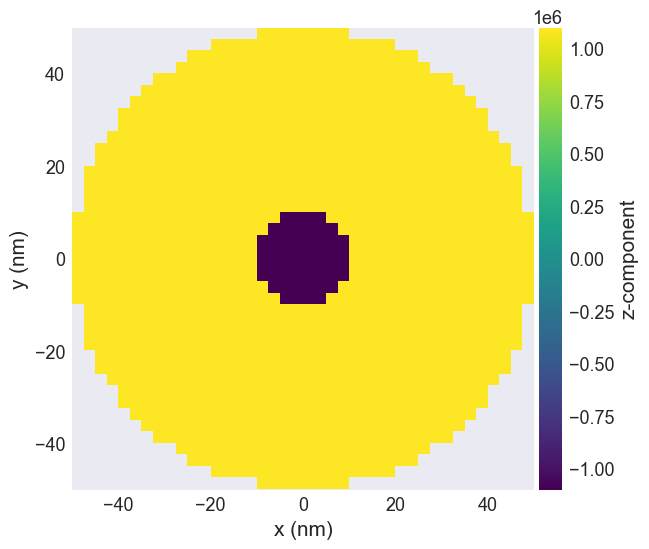

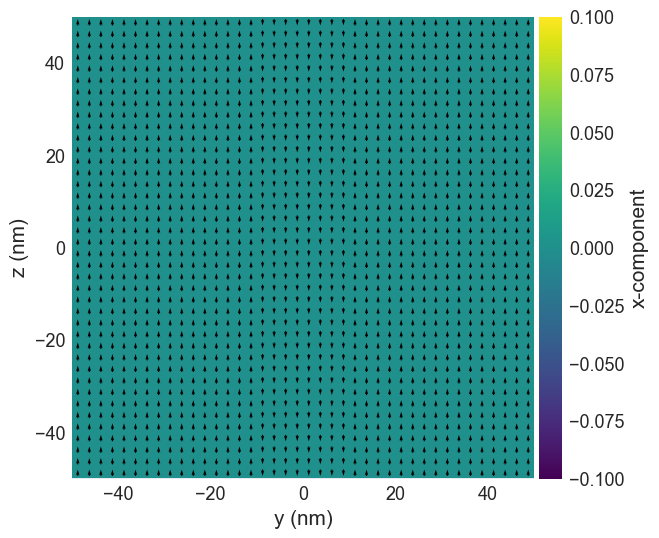

In [18]:
region = df.Region(p1=(-50e-9, -50e-9, -50e-9), p2=(50e-9, 50e-9, 50e-9))
mesh = df.Mesh(region=region, cell=(2.5e-9, 2.5e-9, 2.5e-9))

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='D2d_z')
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1))
            #    + mm.Demag()
               + mm.Zeeman(H=(0, 0, 2e5)))
# system.energy = mm.DMI(D=4e-3, crystalclass='Cnv_z')

Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape,
    Ms inside cylinder.

    Cylinder radius is 50nm.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    """Function to set initial magnetisation direction:
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)


# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)
system.m.plane('z').mpl()
system.m.plane('x').mpl()

In [ ]:
Ms = 1.0  # saturation magnetisation (A/m)
A = 1.0
D = 1*np.tan(2*np.pi/10)
T = 0.8
H = (0, 0, 0.15/(4*np.pi*1e-7))# Should I ionclude m0

region = df.Region(p1=(-25e-9, -25e-9, -25e-9), p2=(25e-9, 25e-9, 25e-9))
mesh = df.Mesh(region=region, cell=(1.25e-9, 1.25e-9, 1.25e-9))

system = mm.System(name='Bloch_skyrmion')

system.energy = (mm.Exchange(A=A)
               + mm.DMI(D=D, crystalclass='T')
            #    + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1))
            #    + mm.Demag()
               + mm.Zeeman(H=H))

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape,
    Ms inside cylinder.

    Cylinder radius is 50nm.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    """Function to set initial magnetisation direction:
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, 1)
    else:
        return (0, 0, 1)

def m_random(pos):
    """Function to set initial magnetisation direction as random"""
    return np.random.rand(3)

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)
system.m.plane('z').mpl()
system.m.plane('x').mpl()

In [19]:
data = Grid(system, Ms=Ms)

In [20]:
schedule1 = {'type': 'FC', 'start_temp': 1.01, 'end_temp': 0.8, 'steps': 2}
schedule2 = {'type': 'ZFC', 'start_temp': 10.01, 'end_temp': 0.01, 'end_field': [0, 0, -1], 'steps': 5}
schedule3 = {'type': 'HFC', 'start_temp': 10.01, 'end_temp': 0.01, 'start_field': [0, 0, -1], 'end_field': [0, 0, 1], 'steps': 5}

schedule4 = {'type': 'ZFC', 'start_temp': 10.01, 'end_temp': 0.01, 'start_field': [0, 0, -1], 'steps': 5}
schedule5 = {'type': 'ZFC', 'start_temp': 10.01, 'end_temp': 0.01, 'start_field': [0, 0, 1], 'end_field': [0, 0, -1], 'steps': 10}
schedule6 = {'type': 'HFC', 'start_temp': 10.01, 'end_temp': 0.01, 'start_field': [0,0,2e7], 'end_field': [0, 0, 0], 'steps': 10}
schedule7 = {'type': 'HFC', 'start_temp': 10.01, 'end_temp': 0.01, 'start_field': [0, 0, -1], 'steps': 5}

In [21]:
mc = MCDrive(data, energy_calc=3, schedule_name='Juan', schedule=schedule1)

Schedule initialized: FC
Start temperature: 1.01K
Steps: 2
End temperature will be 0.8K in -0.10499999999999998K per steps.
Start field: 200000.0
End field will be: 200000.0 in 0.0 per steps.


Step: 0, Temperature: 1.01K, Field: 200000.0
Step: 1, Temperature: 0.91K, Field: 200000.0


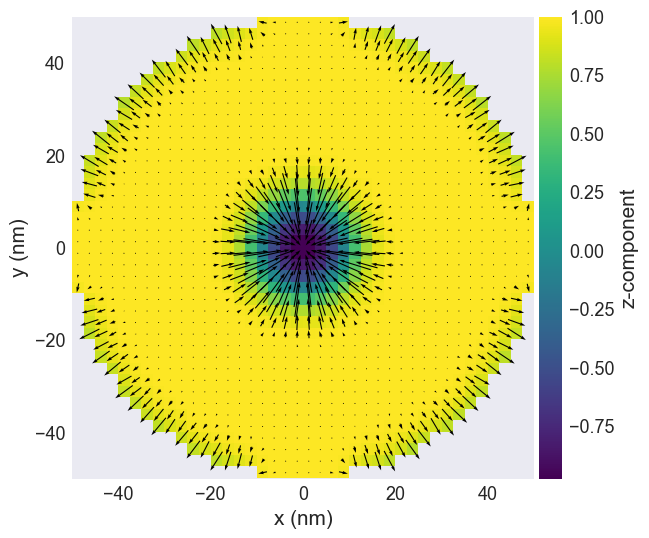

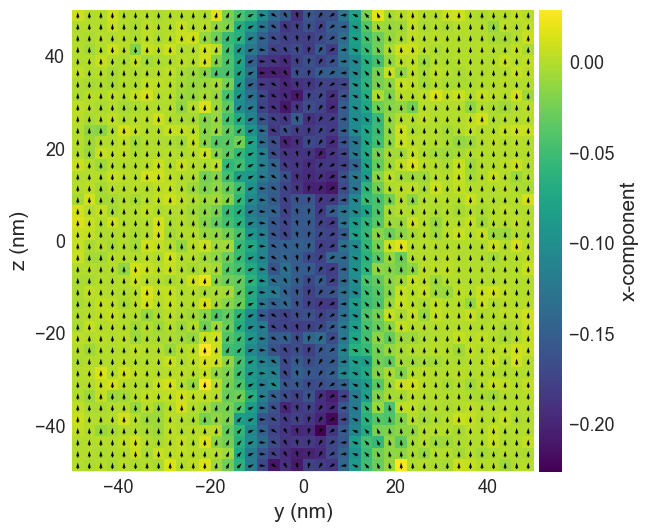

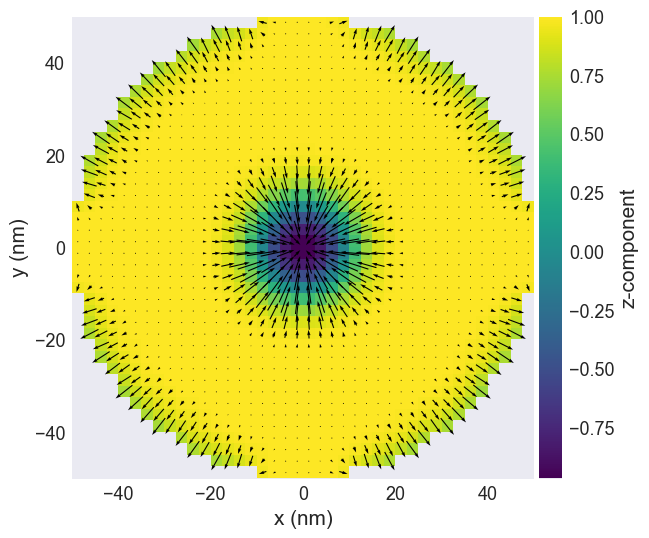

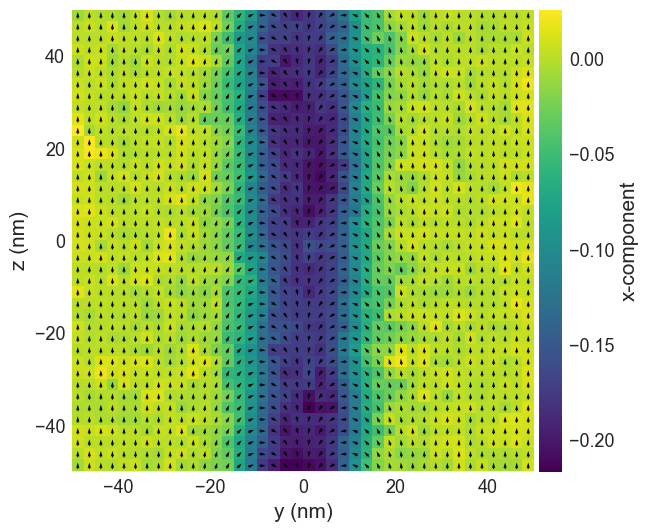

In [22]:
mc.drive(N=10000000, save=True, plot_z=True, plot_x=True)